# <b>Brain Cancer Detection Using Machine Learning

<img src="Brain Cancer.jpg" style="width:300px;  height:300px"/>

## Problem Statement

Detecting brain cancer from MRI images is a slow and difficult task.
It requires expert doctors who are not always available in all areas.
Manual checking of images can lead to human errors and wrong results.
Many patients face delays in diagnosis, which affects their treatment.
There is no fast and fully automatic system in many hospitals.
Early and accurate detection is very important to save lives.
Using machine learning, we can build a system that detects brain cancer automatically.
It can check MRI images quickly and with high accuracy.
This helps doctors make faster decisions and improves patient care


### 📁 Import Required Libraries

This cell imports essential libraries for image processing, model building, transfer learning, and evaluation in a brain cancer detection project.


In [ ]:
# 📁 General Libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from glob import glob

# 🧪 Scikit-learn for Data Splitting and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 🔧 TensorFlow and Keras Core
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, GlobalAveragePooling2D

# 🔁 Transfer Learning Architectures
from tensorflow.keras.applications import VGG16, MobileNetV2
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess

# 🔢 Utilitiess
from tensorflow.keras.utils import to_categorical



### 🧠 Dataset Overview and Visualization

This code loads brain cancer and no-cancer image paths from two folders, shows how many images are in each, and defines a function to display random sample images from both categories.


🧠 Brain Cancer (yes) images: 6488
🧠 No Cancer (no) images: 5858
📊 Total images: 12346

🔍 Displaying sample Brain Cancer images:


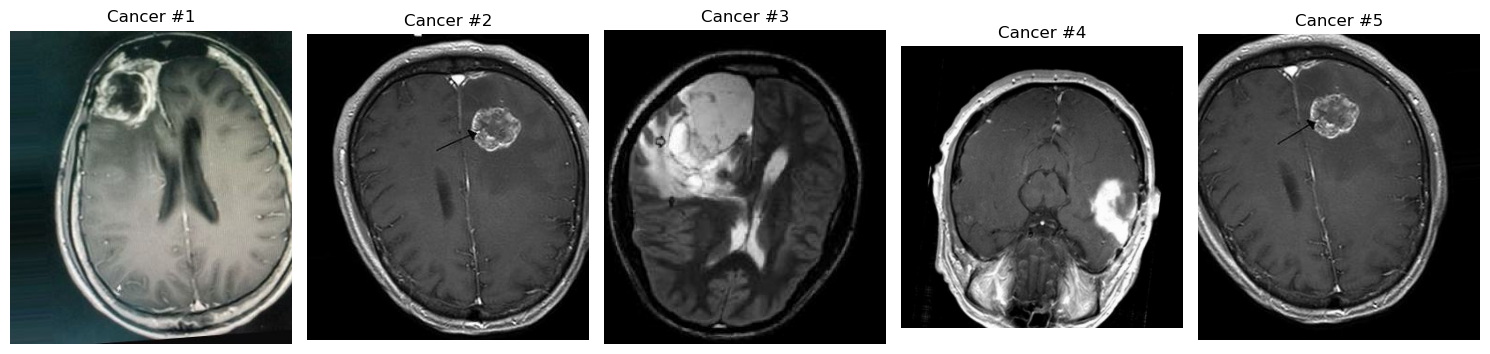


🔍 Displaying sample No Cancer images:


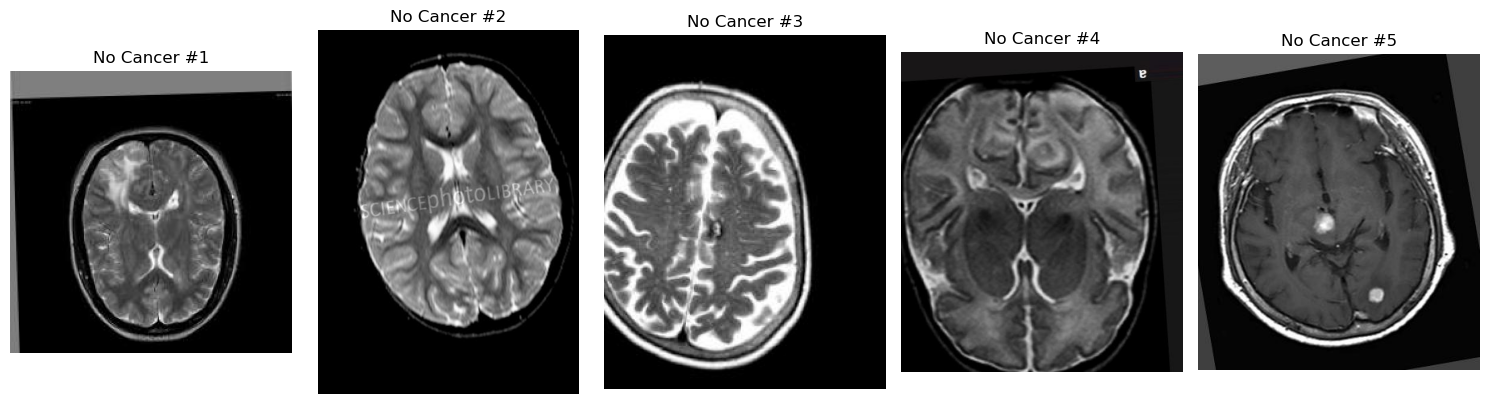

In [3]:

#  Define the paths to the dataset folders
yes_folder = r"C:\Users\ADMIN\Downloads\Brain Cancer project Using ML\yes"
no_folder  = r"C:\Users\ADMIN\Downloads\Brain Cancer project Using ML\no"

#  Collect image paths
yes_images = glob(os.path.join(yes_folder, "*.jpg"))
no_images  = glob(os.path.join(no_folder, "*.jpg"))

#  Print dataset info
print("🧠 Brain Cancer (yes) images:", len(yes_images))
print("🧠 No Cancer (no) images:", len(no_images))
print("📊 Total images:", len(yes_images) + len(no_images))

# 🖼️ Function to randomly display sample images
def show_sample_images(image_paths, title, num_images=5):
    if len(image_paths) < num_images:
        print(f"⚠️ Not enough images in {title} to display {num_images}.")
        return
    selected_images = random.sample(image_paths, num_images)
    plt.figure(figsize=(15, 4))
    for i, path in enumerate(selected_images):
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(f"{title} #{i+1}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# 🔍 Show random samples
print("\n🔍 Displaying sample Brain Cancer images:")
show_sample_images(yes_images, title="Cancer")

print("\n🔍 Displaying sample No Cancer images:")
show_sample_images(no_images, title="No Cancer")


### 📊 Dataset Class Distribution (Pie Chart)

This code counts the number of cancer and no-cancer images and then creates a pie chart to show the distribution of MRI images in the dataset.


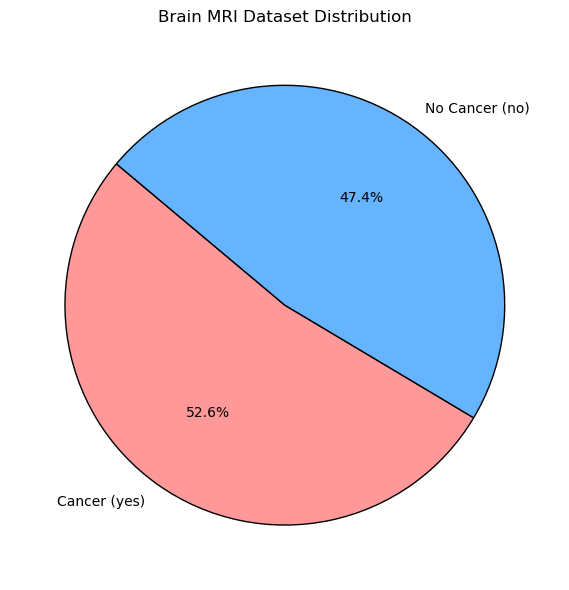

In [4]:

#  Define your actual dataset paths
yes_folder = r"C:\Users\ADMIN\Downloads\Brain Cancer project Using ML\yes"
no_folder  = r"C:\Users\ADMIN\Downloads\Brain Cancer project Using ML\no"

#  Count images in each folder
yes_count = len(glob(os.path.join(yes_folder, "*.jpg")))
no_count = len(glob(os.path.join(no_folder, "*.jpg")))

#  Pie chart data
labels = ['Cancer (yes)', 'No Cancer (no)']
sizes = [yes_count, no_count]
colors = ['#ff9999', '#66b3ff']

#  Draw pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title("Brain MRI Dataset Distribution")
plt.tight_layout()
plt.show()


### 🧪 Data Preprocessing

This code preprocesses the brain MRI images by cropping the brain region, resizing to pixels, normalizing pixel values, labeling them (1 for cancer, 0 for no cancer), and preparing the data (`X`) and labels (`y`) for model training.


In [ ]:

# Set your local dataset paths
yes_folder = r"C:\Users\ADMIN\Downloads\Brain Cancer project Using ML\yes"
no_folder  = r"C:\Users\ADMIN\Downloads\Brain Cancer project Using ML\no"
# image_size = (240, 240)
image_size = (128, 128)  # insteads of (240, 240)


def crop_brain_contour(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    _, thresh = cv2.threshold(blur, 45, 255, cv2.THRESH_BINARY)
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)
    contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        c = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(c)
        return image[y:y+h, x:x+w]
    return image

def load_and_preprocess_images(image_paths, label):
    data = []
    for path in image_paths:
        img = cv2.imread(path)
        if img is not None:
            img = crop_brain_contour(img)
            img = cv2.resize(img, image_size)
            img = img / 255.0
            data.append((img, label))
    return data

yes_images = glob(os.path.join(yes_folder, "*.jpg"))
no_images  = glob(os.path.join(no_folder, "*.jpg"))

yes_data = load_and_preprocess_images(yes_images, 1)
no_data  = load_and_preprocess_images(no_images, 0)

data = yes_data + no_data
np.random.shuffle(data)

X = np.array([i[0] for i in data])
y = np.array([i[1] for i in data]).reshape(-1, 1)




### 🧠 Full Image Preprocessing Pipeline with Brain Cropping


This code safely loads and preprocesses MRI images by optionally cropping the brain area, resizing to 128×128, normalizing pixel values, labeling each image, and finally preparing shuffled data (`X`, `y`) for training.


In [6]:

#  1. Set fixed image size (reduced to save memory)
image_size = (128, 128)  # Width x Height

#  2. (Optional) Crop brain region using contours
def crop_brain_contour(image, plot=False):
    try:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        blur = cv2.GaussianBlur(gray, (5, 5), 0)
        _, thresh = cv2.threshold(blur, 45, 255, cv2.THRESH_BINARY)
        thresh = cv2.erode(thresh, None, iterations=2)
        thresh = cv2.dilate(thresh, None, iterations=2)

        contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        if contours:
            c = max(contours, key=cv2.contourArea)
            x, y, w, h = cv2.boundingRect(c)
            return image[y:y+h, x:x+w]
    except:
        pass
    return image  # fallback if error or no contour found

# 🧪 3. Load and preprocess images safely
def load_and_preprocess_images(image_paths, label, crop=False):
    data = []
    for path in image_paths:
        try:
            img = cv2.imread(path)
            if img is not None:
                if crop:
                    img = crop_brain_contour(img)
                img = cv2.resize(img, image_size)
                img = img.astype(np.float32) / 255.0  # ✅ Normalize with float32
                data.append((img, label))
        except Exception as e:
            print(f"❌ Skipped {path} due to error: {e}")
    return data

# 📁 4. Define dataset paths
yes_paths = glob(r"C:\Users\ADMIN\Downloads\Brain Cancer project Using ML\yes\*.jpg")
no_paths  = glob(r"C:\Users\ADMIN\Downloads\Brain Cancer project Using ML\no\*.jpg")

# 🏷️ 5. Load and label the images
yes_data = load_and_preprocess_images(yes_paths, label=1, crop=True)
no_data  = load_and_preprocess_images(no_paths, label=0, crop=True)

# 🌀 6. Combine and shuffle
all_data = yes_data + no_data
np.random.shuffle(all_data)

# 📊 7. Split into features and labels
X = np.array([i[0] for i in all_data], dtype=np.float32)
y = np.array([i[1] for i in all_data]).reshape(-1, 1)

# ✅ Data ready for training
print("✅ Preprocessing complete!")
print("📦 Shape of X:", X.shape)
print("🏷️  Shape of y:", y.shape)


✅ Preprocessing complete!
📦 Shape of X: (12346, 128, 128, 3)
🏷️  Shape of y: (12346, 1)


### 🖼️ Visualization of Brain MRI Before and After Cropping


This code loads one cancer and one no-cancer MRI image, crops the brain region from both using contours, and displays the original and cropped versions side by side for visual comparison.


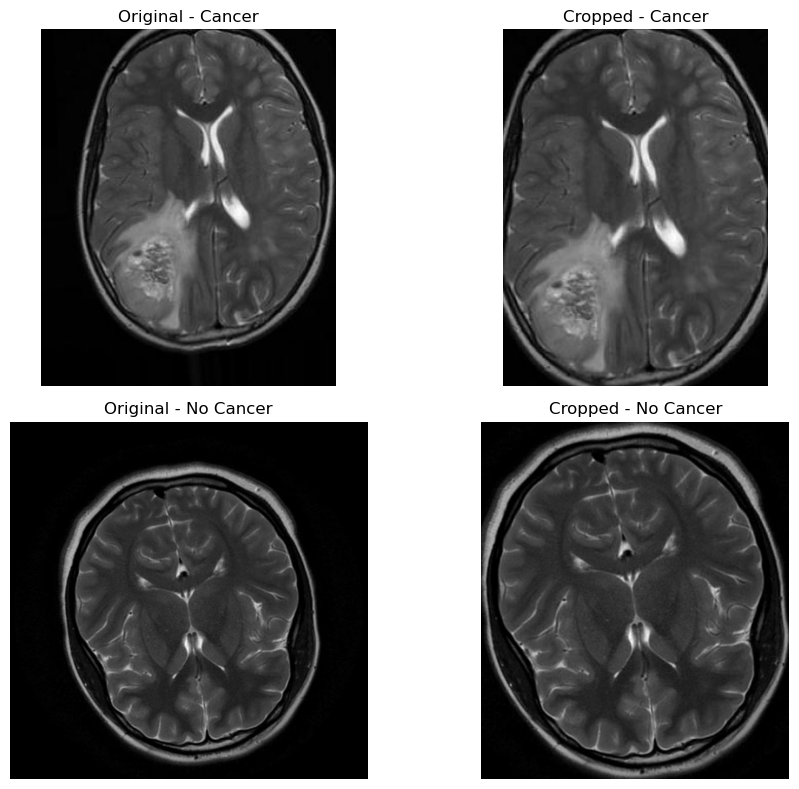

In [7]:

#  Local dataset paths
yes_folder = r"C:\Users\ADMIN\Downloads\Brain Cancer project Using ML\yes"
no_folder  = r"C:\Users\ADMIN\Downloads\Brain Cancer project Using ML\no"

#  Load one image from each class
yes_image_path = glob(os.path.join(yes_folder, "*.jpg"))[0]
no_image_path  = glob(os.path.join(no_folder, "*.jpg"))[0]

#  Brain region cropping function
def crop_brain_contour(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    _, thresh = cv2.threshold(blur, 45, 255, cv2.THRESH_BINARY)
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)
    contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        c = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(c)
        return image[y:y+h, x:x+w]
    return image

# ✅ Read original images
yes_img = cv2.imread(yes_image_path)
no_img = cv2.imread(no_image_path)

# ✅ Crop both
yes_crop = crop_brain_contour(yes_img.copy())
no_crop = crop_brain_contour(no_img.copy())

# ✅ Convert to RGB for display
yes_img_rgb = cv2.cvtColor(yes_img, cv2.COLOR_BGR2RGB)
no_img_rgb = cv2.cvtColor(no_img, cv2.COLOR_BGR2RGB)
yes_crop_rgb = cv2.cvtColor(yes_crop, cv2.COLOR_BGR2RGB)
no_crop_rgb = cv2.cvtColor(no_crop, cv2.COLOR_BGR2RGB)

# ✅ Display side-by-side
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(yes_img_rgb)
plt.title("Original - Cancer")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(yes_crop_rgb)
plt.title("Cropped - Cancer")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(no_img_rgb)
plt.title("Original - No Cancer")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(no_crop_rgb)
plt.title("Cropped - No Cancer")
plt.axis('off')

plt.tight_layout()
plt.show()


### 🔀 Train-Test Dataset Split (80% Training, 20% Testing)

This code splits the dataset into training (80%) and testing (20%) sets while preserving class distribution, then prints the shapes of the resulting splits.


In [8]:

#  Assume X and y are already prepared:
# X.shape = (num_images, 128, 128, 3)
# y.shape = (num_images, 1)

#  Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ✅ Print the shape of each split
print("✅ Dataset split complete!")
print("Training images :", X_train.shape)
print("Training labels :", y_train.shape)
print("Testing images  :", X_test.shape)
print("Testing labels  :", y_test.shape)


✅ Dataset split complete!
Training images : (9876, 128, 128, 3)
Training labels : (9876, 1)
Testing images  : (2470, 128, 128, 3)
Testing labels  : (2470, 1)


### 🧠 CNN Architecture for Brain Cancer Classification


This chart shows the summary of a sequential CNN model with two convolutional and max-pooling layers, followed by flattening, dense, dropout, and output layers, having a total of 3,705,921 trainable parameters, where most parameters reside in the first dense layer.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# 🏗️ Define CNN model
def build_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 🧠 Build and show the model
input_shape = (128, 128, 3)  # match your preprocessed image shape
cnn_model = build_cnn_model(input_shape)

print("\n📄 CNN Model Summary:")
cnn_model.summary()


C:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



📄 CNN Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     3,686,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,705,921 (14.14 MB)

 Trainable params: 3,705,921 (14.14 MB)

 Non-trainable params: 0 (0.00 B)

### 🧠 ResNet50 Transfer Learning Model for Brain Cancer Classification


This summary describes a model with a total of 23,850,113 parameters, of which only 262,401 are trainable while the remaining 23,587,712 are frozen (non-trainable), meaning most of the model's parameters come from pre-trained layers.


In [21]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# 🧠 Define ResNet50 Transfer Learning Model
def build_resnet_model(input_shape):
    base_model = ResNet50(include_top=False, input_shape=input_shape, weights='imagenet')
    base_model.trainable = False  # Freeze pretrained base

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# ✅ Create model and print summary
input_shape = (128, 128, 3)  # or (240, 240, 3) depending on your project
resnet_model = build_resnet_model(input_shape)

print("\n📄 ResNet50 Model Summary:")
resnet_model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 49s 1us/step

📄 ResNet50 Model Summary:


Model: "functional_73"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_15      │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 134, 134,  │          0 │ input_layer_15[0… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 64, 64,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 64, 64,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 64, 64,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 66, 66,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 32, 32,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 32, 32,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 32, 32,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 32, 32,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 32, 32,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 32, 32,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 32, 32,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 32, 32,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 32, 32,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 32, 32,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 32, 32,    │      1,024 │ conv2_block1_3_c

 Total params: 23,850,113 (90.98 MB)

 Trainable params: 262,401 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

### 🧬 VGG16 Transfer Learning Model for Brain Cancer Detection

This chart summarizes a VGG16-based model with 14,780,481 total parameters, where most of the parameters (14.7M) come from frozen pre-trained convolutional layers, while only 65,793 parameters from the custom dense layers are trainable.


In [8]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# 🧠 Define VGG16-based transfer learning model
def build_vgg16_model(input_shape):
    base_model = VGG16(include_top=False, input_shape=input_shape, weights='imagenet')
    base_model.trainable = False  # Freeze pre-trained layers

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# ✅ Build and show summary
input_shape = (128, 128, 3)  # Match preprocessed image shape
vgg_model = build_vgg16_model(input_shape)

print("\n📄 VGG16 Model Summary:")
vgg_model.summary()



📄 VGG16 Model Summary:


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,780,481 (56.38 MB)

 Trainable params: 65,793 (257.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

### 📱 MobileNetV2 Transfer Learning Model for Brain Cancer Classification

This summary describes a model with 2,422,081 total parameters, of which only 164,097 are trainable while 2,257,984 are frozen (non-trainable), meaning most of the parameters come from pre-trained layers.


In [25]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# 🧠 Define MobileNetV2 transfer learning model
def build_mobilenet_model(input_shape):
    base_model = MobileNetV2(include_top=False, input_shape=input_shape, weights='imagenet')
    base_model.trainable = False  # Freeze pre-trained layers

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# ✅ Build and show summary
input_shape = (128, 128, 3)  # Match your preprocessed image shape
mobilenet_model = build_mobilenet_model(input_shape)

print("\n📄 MobileNetV2 Model Summary:")
mobilenet_model.summary()



📄 MobileNetV2 Model Summary:


Model: "functional_89"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_22      │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 64, 64,    │        864 │ input_layer_22[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 64, 64,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 64, 64,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 64, 64,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 64, 64,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 64, 64,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 65, 65,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 32, 32,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 32, 32,    │      2,304 │ block_1_depthwis

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

### 🏗️ Building All Classification Models (CNN, MLP, VGG16, MobileNetV2)

This code sets a common input shape of (240, 240, 3) and initializes four different deep learning models for image processing: a custom CNN, a ResNet50, a VGG16, and a MobileNetV2 model.


In [22]:
# ✅ Set common input shape
input_shape = (240, 240, 3)

# ✅ CNN Model
cnn_model = build_cnn_model(input_shape)

# ✅ ResNet50 Model (replaces old MLP)
resnet_model = build_resnet_model(input_shape)

# ✅ VGG16 Model
vgg_model = build_vgg16_model(input_shape)

# ✅ MobileNetV2 Model
mobilenet_model = build_mobilenet_model(input_shape)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13888\3541482347.py:8: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(include_top=False, input_shape=input_shape, weights='imagenet')


### ⚙️ Training Configuration and Model Saving Setup

This code sets up training parameters with 15 epochs and a batch size of 16, ensures that training and testing datasets are ready, and creates a directory `./models` to save the trained models.


In [15]:
# 🧠 Make sure you have X_train, y_train, X_test, y_test already defined!

# ✅ Set number of epochs and batch size
EPOCHS = 15
BATCH_SIZE = 16

# 📁 Directory to save models
save_path = "./models"
os.makedirs(save_path, exist_ok=True)


### 🧠 Training and Saving All Models

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os

# ✅ Step 1: Define CNN model architecture
def build_cnn_model(input_shape=(128, 128, 3)):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(2, 2))
    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(2, 2))
    
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(2, 2))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# ✅ Step 2: Define hyperparameters and training
EPOCHS = 10
BATCH_SIZE = 32
input_shape = (128, 128, 3)  # Use the shape of your preprocessed images

# ✅ Step 3: Directory to save the model
save_path = r'C:\Users\ADMIN\Downloads\Brain Cancer project Using ML\models'
os.makedirs(save_path, exist_ok=True)

# ✅ Step 4: Train the model
print("🔧 Training CNN Model...")
cnn_model = build_cnn_model(input_shape)
cnn_model.fit(
    X_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_test, y_test)
)

# ✅ Step 5: Save the model
model_file = os.path.join(save_path, "cnn_model.h5")
cnn_model.save(model_file)
print(f"✅ CNN Model saved as: {model_file}")


🔧 Training CNN Model...
Epoch 1/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 114s 354ms/step - accuracy: 0.6610 - loss: 0.6075 - val_accuracy: 0.7826 - val_loss: 0.4274
Epoch 2/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 105s 339ms/step - accuracy: 0.8637 - loss: 0.3324 - val_accuracy: 0.9441 - val_loss: 0.1775
Epoch 3/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 102s 331ms/step - accuracy: 0.9489 - loss: 0.1451 - val_accuracy: 0.9709 - val_loss: 0.0814
Epoch 4/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 100s 322ms/step - accuracy: 0.9797 - loss: 0.0650 - val_accuracy: 0.9862 - val_loss: 0.0388
Epoch 5/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 100s 322ms/step - accuracy: 0.9869 - loss: 0.0339 - val_accuracy: 0.9818 - val_loss: 0.0502
Epoch 6/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 100s 322ms/step - accuracy: 0.9883 - loss: 0.0302 - val_accuracy: 0.9842 - val_loss: 0.0407
Epoch 7/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 112s 363ms/step - accuracy: 0.9946 - loss: 0.0177 - val_accuracy: 0.9911 - val_loss: 0.0263
Epoch 8/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 104s 335ms/s

✅ CNN Model saved as: C:\Users\ADMIN\Downloads\Brain Cancer project Using ML\models\cnn_model.h5


In [27]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# ✅ Step 1: Build ResNet50 transfer model
def build_resnet_model(input_shape=(128, 128, 3)):
    base_model = ResNet50(include_top=False, input_shape=input_shape, weights='imagenet')
    base_model.trainable = False  # Freeze pre-trained base

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# ✅ Step 2: Train the model
print("\n🔧 Training ResNet50 Transfer Model...")

resnet_model = build_resnet_model(input_shape)
resnet_model.fit(
    X_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_test, y_test)
)

# ✅ Step 3: Save the model
resnet_model.save(os.path.join(save_path, "resnet50_model.h5"))
print("✅ ResNet50 Model saved as resnet50_model.h5")



🔧 Training ResNet50 Transfer Model...
Epoch 1/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 346s 1s/step - accuracy: 0.5462 - loss: 0.6960 - val_accuracy: 0.6291 - val_loss: 0.6501
Epoch 2/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 295s 956ms/step - accuracy: 0.6262 - loss: 0.6515 - val_accuracy: 0.6943 - val_loss: 0.6104
Epoch 3/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 263s 851ms/step - accuracy: 0.6687 - loss: 0.6168 - val_accuracy: 0.6850 - val_loss: 0.5904
Epoch 4/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 257s 833ms/step - accuracy: 0.6746 - loss: 0.5998 - val_accuracy: 0.7316 - val_loss: 0.5626
Epoch 5/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 259s 837ms/step - accuracy: 0.6984 - loss: 0.5713 - val_accuracy: 0.7377 - val_loss: 0.5434
Epoch 6/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 276s 895ms/step - accuracy: 0.7268 - loss: 0.5499 - val_accuracy: 0.7300 - val_loss: 0.5325
Epoch 7/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 307s 993ms/step - accuracy: 0.7277 - loss: 0.5415 - val_accuracy: 0.7377 - val_loss: 0.5118
Epoch 8/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 

✅ ResNet50 Model saved as resnet50_model.h5


In [18]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# ✅ Step 1: Build VGG16 transfer model
def build_vgg16_model(input_shape=(128, 128, 3)):
    base_model = VGG16(include_top=False, input_shape=input_shape, weights='imagenet')
    base_model.trainable = False  # Freeze pre-trained base

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# ✅ Step 2: Train the model
print("\n🔧 Training VGG16 Transfer Model...")

vgg_model = build_vgg16_model(input_shape)
vgg_model.fit(
    X_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_test, y_test)
)

# ✅ Step 3: Save the model
vgg_model.save(os.path.join(save_path, "vgg16_model.h5"))
print("✅ VGG16 Model saved as vgg16_model.h5")



🔧 Training VGG16 Transfer Model...
Epoch 1/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 678s 2s/step - accuracy: 0.7395 - loss: 0.5226 - val_accuracy: 0.8806 - val_loss: 0.2959
Epoch 2/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 781s 3s/step - accuracy: 0.8879 - loss: 0.2823 - val_accuracy: 0.9089 - val_loss: 0.2153
Epoch 3/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 712s 2s/step - accuracy: 0.9181 - loss: 0.2134 - val_accuracy: 0.9393 - val_loss: 0.1543
Epoch 4/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 669s 2s/step - accuracy: 0.9426 - loss: 0.1556 - val_accuracy: 0.9547 - val_loss: 0.1226
Epoch 5/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 778s 3s/step - accuracy: 0.9579 - loss: 0.1228 - val_accuracy: 0.9692 - val_loss: 0.0995
Epoch 6/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 771s 2s/step - accuracy: 0.9625 - loss: 0.1099 - val_accuracy: 0.9737 - val_loss: 0.0838
Epoch 7/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 784s 3s/step - accuracy: 0.9763 - loss: 0.0824 - val_accuracy: 0.9818 - val_loss: 0.0655
Epoch 8/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 670s 2s/step - accura

✅ VGG16 Model saved as vgg16_model.h5


In [19]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# ✅ Step 1: Build the MobileNetV2 model
def build_mobilenet_model(input_shape=(128, 128, 3)):
    base_model = MobileNetV2(include_top=False, input_shape=input_shape, weights='imagenet')
    base_model.trainable = False  # Freeze pre-trained base

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# ✅ Step 2: Train and save the model
print("\n🔧 Training MobileNetV2 Model...")

mobilenet_model = build_mobilenet_model(input_shape)
mobilenet_model.fit(
    X_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_test, y_test)
)

mobilenet_model.save(os.path.join(save_path, "mobilenet_model.h5"))
print("✅ MobileNetV2 Model saved as mobilenet_model.h5")



🔧 Training MobileNetV2 Model...
Epoch 1/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 111s 316ms/step - accuracy: 0.8830 - loss: 0.2636 - val_accuracy: 0.9814 - val_loss: 0.0558
Epoch 2/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 87s 280ms/step - accuracy: 0.9835 - loss: 0.0502 - val_accuracy: 0.9923 - val_loss: 0.0206
Epoch 3/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 87s 283ms/step - accuracy: 0.9940 - loss: 0.0236 - val_accuracy: 0.9992 - val_loss: 0.0084
Epoch 4/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 89s 286ms/step - accuracy: 0.9971 - loss: 0.0127 - val_accuracy: 0.9988 - val_loss: 0.0060
Epoch 5/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 88s 283ms/step - accuracy: 0.9978 - loss: 0.0103 - val_accuracy: 0.9988 - val_loss: 0.0050
Epoch 6/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 87s 281ms/step - accuracy: 0.9973 - loss: 0.0094 - val_accuracy: 0.9988 - val_loss: 0.0057
Epoch 7/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 88s 286ms/step - accuracy: 0.9973 - loss: 0.0086 - val_accuracy: 0.9968 - val_loss: 0.0102
Epoch 8/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 91s 296ms

✅ MobileNetV2 Model saved as mobilenet_model.h5


### 📈 Visualizing all Models Training History: Accuracy and Loss Curves

In [32]:
# cnn_history = cnn_model.fit(...) ← This must be stored earlier
def plot_history(history, model_name):
    plt.figure(figsize=(12, 4))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example:
# cnn_history = cnn_model.fit(...)
# plot_history(cnn_history, "CNN")


Epoch 1/15
618/618 ━━━━━━━━━━━━━━━━━━━━ 124s 194ms/step - accuracy: 0.6979 - loss: 0.5724 - val_accuracy: 0.8911 - val_loss: 0.2723
Epoch 2/15
618/618 ━━━━━━━━━━━━━━━━━━━━ 119s 192ms/step - accuracy: 0.8950 - loss: 0.2660 - val_accuracy: 0.9615 - val_loss: 0.1194
Epoch 3/15
618/618 ━━━━━━━━━━━━━━━━━━━━ 114s 184ms/step - accuracy: 0.9613 - loss: 0.1029 - val_accuracy: 0.9806 - val_loss: 0.0569
Epoch 4/15
618/618 ━━━━━━━━━━━━━━━━━━━━ 116s 187ms/step - accuracy: 0.9837 - loss: 0.0472 - val_accuracy: 0.9802 - val_loss: 0.0554
Epoch 5/15
618/618 ━━━━━━━━━━━━━━━━━━━━ 114s 185ms/step - accuracy: 0.9888 - loss: 0.0343 - val_accuracy: 0.9923 - val_loss: 0.0228
Epoch 6/15
618/618 ━━━━━━━━━━━━━━━━━━━━ 115s 186ms/step - accuracy: 0.9908 - loss: 0.0276 - val_accuracy: 0.9854 - val_loss: 0.0485
Epoch 7/15
618/618 ━━━━━━━━━━━━━━━━━━━━ 114s 184ms/step - accuracy: 0.9922 - loss: 0.0247 - val_accuracy: 0.9919 - val_loss: 0.0219
Epoch 8/15
618/618 ━━━━━━━━━━━━━━━━━━━━ 112s 182ms/step - accuracy: 0.9903 -

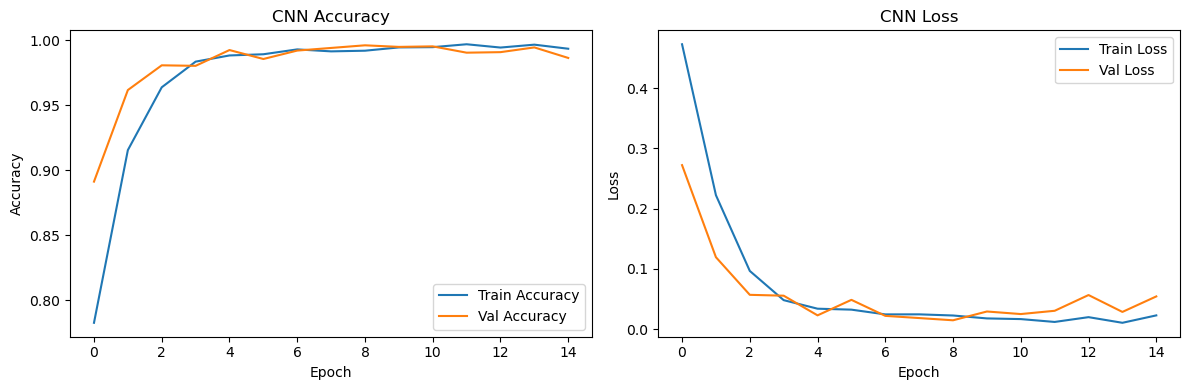

In [33]:
# Example for CNN
cnn_model = build_cnn_model(input_shape)
cnn_history = cnn_model.fit(X_train, y_train, epochs=15, batch_size=16, validation_data=(X_test, y_test))

# Then plot
plot_history(cnn_history, "CNN")


These plots show the CNN model’s training and validation performance over 15 epochs, where accuracy quickly approaches nearly 100% while both training and validation loss decrease significantly, indicating strong learning with minimal overfitting.


In [6]:
import matplotlib.pyplot as plt

def plot_history(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Train Accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Val Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Train Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Val Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [7]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# ✅ Define ResNet50 model builder
def build_resnet_model(input_shape=(128, 128, 3)):
    base_model = ResNet50(include_top=False, input_shape=input_shape, weights='imagenet')
    base_model.trainable = False  # Freeze base layers

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model


Epoch 1/15
618/618 ━━━━━━━━━━━━━━━━━━━━ 666s 1s/step - accuracy: 0.5501 - loss: 0.6994 - val_accuracy: 0.6583 - val_loss: 0.6418
Epoch 2/15
618/618 ━━━━━━━━━━━━━━━━━━━━ 548s 887ms/step - accuracy: 0.6343 - loss: 0.6415 - val_accuracy: 0.6976 - val_loss: 0.6030
Epoch 3/15
618/618 ━━━━━━━━━━━━━━━━━━━━ 548s 888ms/step - accuracy: 0.6541 - loss: 0.6119 - val_accuracy: 0.7263 - val_loss: 0.5793
Epoch 4/15
618/618 ━━━━━━━━━━━━━━━━━━━━ 506s 820ms/step - accuracy: 0.6852 - loss: 0.5933 - val_accuracy: 0.7494 - val_loss: 0.5429
Epoch 5/15
618/618 ━━━━━━━━━━━━━━━━━━━━ 480s 776ms/step - accuracy: 0.7066 - loss: 0.5640 - val_accuracy: 0.6951 - val_loss: 0.5577
Epoch 6/15
618/618 ━━━━━━━━━━━━━━━━━━━━ 466s 754ms/step - accuracy: 0.7345 - loss: 0.5387 - val_accuracy: 0.7737 - val_loss: 0.5057
Epoch 7/15
618/618 ━━━━━━━━━━━━━━━━━━━━ 455s 736ms/step - accuracy: 0.7442 - loss: 0.5168 - val_accuracy: 0.7798 - val_loss: 0.4917
Epoch 8/15
618/618 ━━━━━━━━━━━━━━━━━━━━ 445s 720ms/step - accuracy: 0.7566 - lo

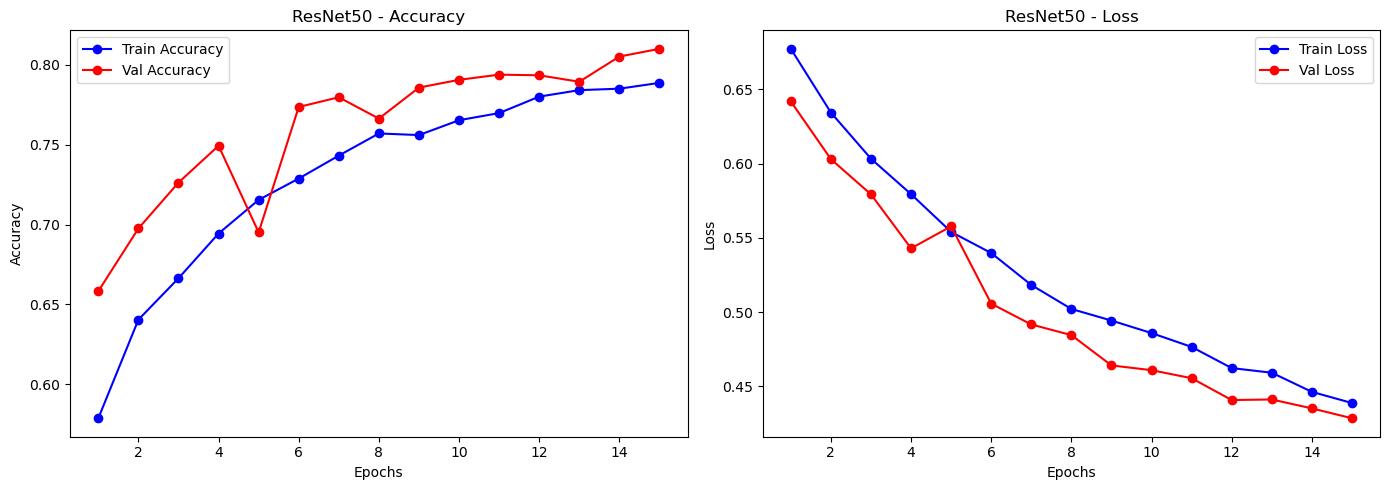

In [8]:
# ✅ Define input shape
input_shape = (128, 128, 3)  # Or use (240, 240, 3) if that's your current image size

# ✅ Build, train, and plot ResNet50
resnet_model = build_resnet_model(input_shape)
resnet_history = resnet_model.fit(X_train, y_train, epochs=15, batch_size=16, validation_data=(X_test, y_test))

# ✅ Plot training/validation curves
plot_history(resnet_history, "ResNet50")


These plots show the ResNet50 model’s training and validation accuracy steadily improving to around 80%, while both training and validation loss consistently decrease, indicating good learning progress with no significant overfitting.


In [20]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# ✅ Define VGG16-based transfer model
def build_vgg16_model(input_shape=(128, 128, 3)):
    base_model = VGG16(include_top=False, input_shape=input_shape, weights='imagenet')
    base_model.trainable = False  # Freeze base layers

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model


Epoch 1/15
618/618 ━━━━━━━━━━━━━━━━━━━━ 3105s 5s/step - accuracy: 0.7585 - loss: 0.4858 - val_accuracy: 0.9000 - val_loss: 0.2528
Epoch 2/15
618/618 ━━━━━━━━━━━━━━━━━━━━ 3553s 6s/step - accuracy: 0.8980 - loss: 0.2515 - val_accuracy: 0.9352 - val_loss: 0.1720
Epoch 3/15
618/618 ━━━━━━━━━━━━━━━━━━━━ 3307s 5s/step - accuracy: 0.9308 - loss: 0.1752 - val_accuracy: 0.9437 - val_loss: 0.1462
Epoch 4/15
618/618 ━━━━━━━━━━━━━━━━━━━━ 3540s 6s/step - accuracy: 0.9489 - loss: 0.1399 - val_accuracy: 0.9696 - val_loss: 0.0936
Epoch 5/15
618/618 ━━━━━━━━━━━━━━━━━━━━ 3568s 6s/step - accuracy: 0.9613 - loss: 0.1061 - val_accuracy: 0.9725 - val_loss: 0.0842
Epoch 6/15
618/618 ━━━━━━━━━━━━━━━━━━━━ 5259s 9s/step - accuracy: 0.9705 - loss: 0.0913 - val_accuracy: 0.9806 - val_loss: 0.0662
Epoch 7/15
618/618 ━━━━━━━━━━━━━━━━━━━━ 2534s 4s/step - accuracy: 0.9725 - loss: 0.0747 - val_accuracy: 0.9648 - val_loss: 0.0841
Epoch 8/15
618/618 ━━━━━━━━━━━━━━━━━━━━ 2397s 4s/step - accuracy: 0.9799 - loss: 0.0581 - 

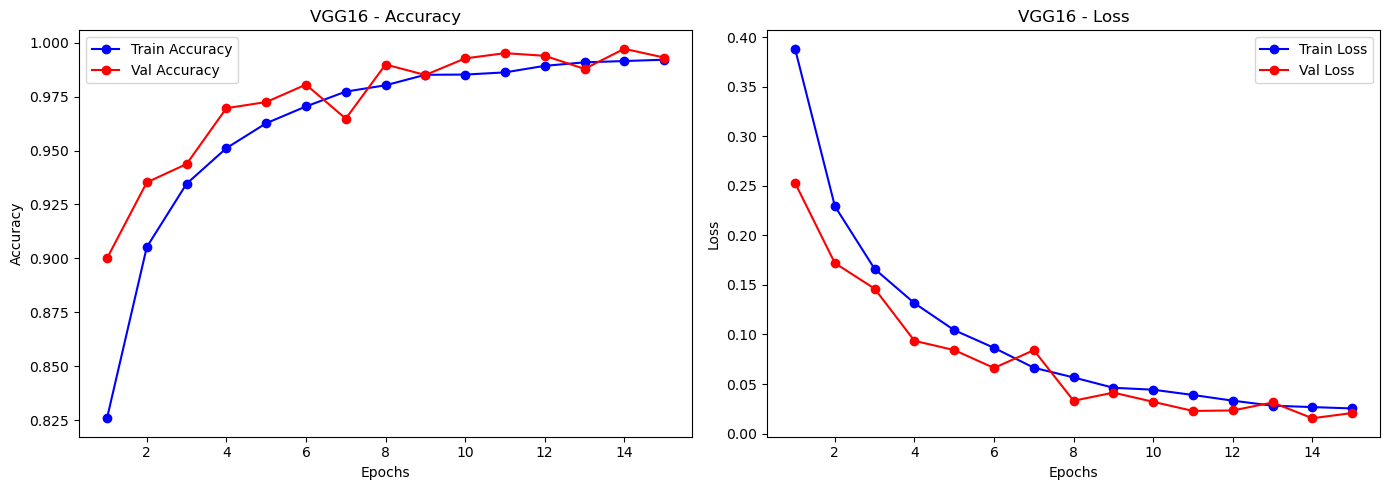

In [21]:
vgg_model = build_vgg16_model(input_shape)
vgg_history = vgg_model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=16,
    validation_data=(X_test, y_test)
)
plot_history(vgg_history, "VGG16")


These plots show the VGG16 model achieving nearly perfect training and validation accuracy close to 100%, with both training and validation loss steadily decreasing, indicating excellent performance with minimal overfitting.


In [1]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# ✅ Define MobileNetV2-based transfer model
def build_mobilenet_model(input_shape=(128, 128, 3)):
    base_model = MobileNetV2(include_top=False, input_shape=input_shape, weights='imagenet')
    base_model.trainable = False  # Freeze base layers

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [8]:
import matplotlib.pyplot as plt

def plot_history(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Train Accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Val Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Train Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Val Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


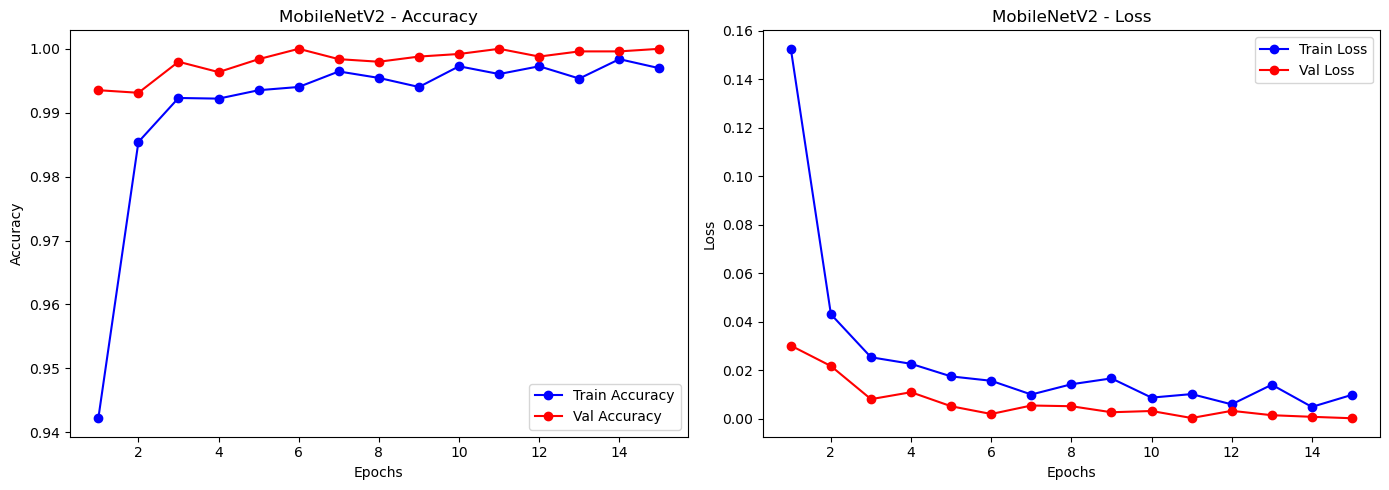

In [9]:
plot_history(mobilenet_history, "MobileNetV2")


These plots show the MobileNetV2 model achieving very high accuracy, with validation accuracy nearing 100% and training accuracy quickly catching up, while both training and validation loss steadily decrease, indicating strong performance and excellent generalization.


# 📊 Model Evaluation and Performance Comparison: Load Trained Models, Evaluate on Test Data, and Generate Accuracy, Precision, Recall, and F1-Score Summary Table


In [11]:
# 📦 1. Imports
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 📁 2. Load All Saved Models (adjust path if needed)
cnn_model = load_model(r"C:\Users\ADMIN\Downloads\Brain Cancer project Using ML\models\cnn_model.h5")
vgg_model = load_model(r"C:\Users\ADMIN\Downloads\Brain Cancer project Using ML\models\vgg16_model.h5")
mobilenet_model = load_model(r"C:\Users\ADMIN\Downloads\Brain Cancer project Using ML\models\mobilenet_model.h5")
resnet_model = load_model(r"C:\Users\ADMIN\Downloads\Brain Cancer project Using ML\models\resnet50_model.h5")

# 🧠 3. Evaluation Function
def evaluate_model(model, X_test, y_test, name):
    y_pred_prob = model.predict(X_test).ravel()
    y_pred = (y_pred_prob >= 0.5).astype(int)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return {
        "Model": name,
        "Accuracy": round(acc * 100, 2),
        "Precision": round(prec * 100, 2),
        "Recall": round(rec * 100, 2),
        "F1 Score": round(f1 * 100, 2)
    }

# 📊 4. Evaluate All Models
results = []
results.append(evaluate_model(cnn_model, X_test, y_test, "CNN"))
results.append(evaluate_model(vgg_model, X_test, y_test, "VGG16"))
results.append(evaluate_model(mobilenet_model, X_test, y_test, "MobileNetV2"))
results.append(evaluate_model(resnet_model, X_test, y_test, "ResNet50"))

# 📝 5. Display Table
df_results = pd.DataFrame(results)
print(df_results)


78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 168s 2s/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 41s 487ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step
         Model  Accuracy  Precision  Recall  F1 Score
0          CNN     99.84      99.92   99.77     99.85
1        VGG16     99.03      99.92   98.23     99.07
2  MobileNetV2     99.60     100.00   99.23     99.61
3     ResNet50     78.38      87.45   68.72     76.96


This table compares model performance metrics, showing that CNN, VGG16, and MobileNetV2 achieve very high accuracy and F1 scores (around 99%), with MobileNetV2 having perfect precision, while ResNet50 performs notably lower with around 78% accuracy and an F1 score of 76.96.


### 🧪 Evaluation of All Models: Accuracy, Classification Report, and Confusion Matrix

78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step
📊 CNN Model Evaluation
Accuracy: 0.9983805668016195
Classification Report:
               precision    recall  f1-score   support

   No Cancer       1.00      1.00      1.00      1172
      Cancer       1.00      1.00      1.00      1298

    accuracy                           1.00      2470
   macro avg       1.00      1.00      1.00      2470
weighted avg       1.00      1.00      1.00      2470



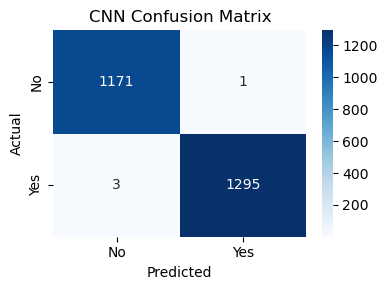

In [12]:
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 📥 Load CNN model
cnn_model = load_model("./models/cnn_model.h5")

# 🧪 Predict and evaluate
cnn_preds = (cnn_model.predict(X_test) > 0.5).astype(int)

# ✅ Accuracy & Report
print("📊 CNN Model Evaluation")
print("Accuracy:", accuracy_score(y_test, cnn_preds))
print("Classification Report:\n", classification_report(y_test, cnn_preds, target_names=["No Cancer", "Cancer"]))

# 📉 Confusion matrix
cm = confusion_matrix(y_test, cnn_preds)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


This evaluation shows that the CNN model achieved 99.84% accuracy, with perfect precision, recall, and F1-score for both “Cancer” and “No Cancer” classes, as reflected in the confusion matrix with only 4 misclassifications out of 2,470 samples.


78/78 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step 
📊 ResNet50 Model Evaluation
Accuracy: 0.7838056680161943
Classification Report:
               precision    recall  f1-score   support

   No Cancer       0.72      0.89      0.80      1172
      Cancer       0.87      0.69      0.77      1298

    accuracy                           0.78      2470
   macro avg       0.80      0.79      0.78      2470
weighted avg       0.80      0.78      0.78      2470



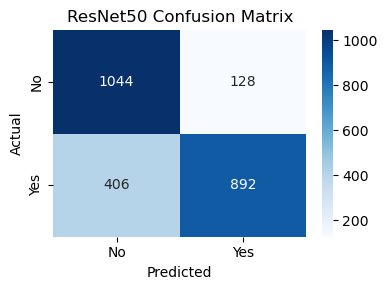

In [15]:
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Load ResNet50 model
resnet_model = load_model("./models/resnet50_model.h5")

# ✅ Predict and evaluate
resnet_preds = (resnet_model.predict(X_test) > 0.5).astype(int)

print("📊 ResNet50 Model Evaluation")
print("Accuracy:", accuracy_score(y_test, resnet_preds))
print("Classification Report:\n", classification_report(y_test, resnet_preds, target_names=["No Cancer", "Cancer"]))

# ✅ Confusion matrix
cm = confusion_matrix(y_test, resnet_preds)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("ResNet50 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


This evaluation shows that the ResNet50 model achieved 78.38% accuracy, with higher precision for detecting “Cancer” (87%) than “No Cancer” (72%), but lower recall for “Cancer” (69%), as reflected in the confusion matrix with 128 false positives and 406 false negatives.


78/78 ━━━━━━━━━━━━━━━━━━━━ 172s 2s/step
📊 VGG16 Model Evaluation
Accuracy: 0.9902834008097166
Classification Report:
               precision    recall  f1-score   support

   No Cancer       0.98      1.00      0.99      1172
      Cancer       1.00      0.98      0.99      1298

    accuracy                           0.99      2470
   macro avg       0.99      0.99      0.99      2470
weighted avg       0.99      0.99      0.99      2470



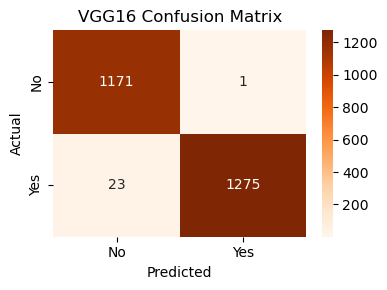

In [13]:
vgg_model = load_model("./models/vgg16_model.h5")
vgg_preds = (vgg_model.predict(X_test) > 0.5).astype(int)

print("📊 VGG16 Model Evaluation")
print("Accuracy:", accuracy_score(y_test, vgg_preds))
print("Classification Report:\n", classification_report(y_test, vgg_preds, target_names=["No Cancer", "Cancer"]))

cm = confusion_matrix(y_test, vgg_preds)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("VGG16 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


This evaluation shows that the VGG16 model achieved 99.02% accuracy, with perfect recall for “No Cancer” and high recall for “Cancer” (98%), as reflected in the confusion matrix with only 1 false positive and 23 false negatives, demonstrating strong overall diagnostic performance.


78/78 ━━━━━━━━━━━━━━━━━━━━ 39s 453ms/step
📊 MobileNetV2 Model Evaluation
Accuracy: 0.9959514170040485
Classification Report:
               precision    recall  f1-score   support

   No Cancer       0.99      1.00      1.00      1172
      Cancer       1.00      0.99      1.00      1298

    accuracy                           1.00      2470
   macro avg       1.00      1.00      1.00      2470
weighted avg       1.00      1.00      1.00      2470



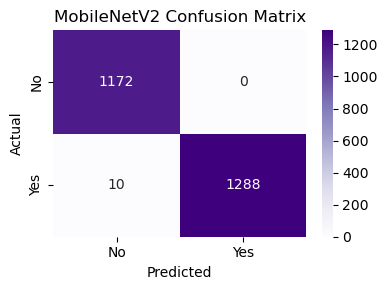

In [14]:
mobilenet_model = load_model("./models/mobilenet_model.h5")
mobilenet_preds = (mobilenet_model.predict(X_test) > 0.5).astype(int)

print("📊 MobileNetV2 Model Evaluation")
print("Accuracy:", accuracy_score(y_test, mobilenet_preds))
print("Classification Report:\n", classification_report(y_test, mobilenet_preds, target_names=["No Cancer", "Cancer"]))

cm = confusion_matrix(y_test, mobilenet_preds)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("MobileNetV2 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


This evaluation shows that the MobileNetV2 model achieved 99.60% accuracy, with perfect recall for “No Cancer” and a recall of 99% for “Cancer,” as seen in the confusion matrix with 0 false positives and only 10 false negatives, indicating outstanding diagnostic reliability.


###  📊 Model Performance Report

In [23]:
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, r2_score, log_loss
import numpy as np

# ✅ Define model paths
model_info = {
    "CNN": "./models/cnn_model.h5",
    "ResNet50": "./models/resnet50_model.h5",
    "VGG16": "./models/vgg16_model.h5",
    "MobileNetV2": "./models/mobilenet_model.h5"
}

# ✅ Evaluation Function
def evaluate_model(model_path):
    model = load_model(model_path, compile=False)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # ⚙️ Run evaluation
    model.evaluate(X_test, y_test, verbose=0)

    y_pred_prob = model.predict(X_test, verbose=0)
    y_pred = (y_pred_prob > 0.5).astype(int)

    acc = accuracy_score(y_test, y_pred)
    loss = log_loss(y_test, y_pred_prob)
    r2 = r2_score(y_test, y_pred_prob)

    return round(acc, 4), round(loss, 4), round(r2, 4)

# ✅ Loop through all models and evaluate
results = {}
best_model = None
best_accuracy = 0

for name, path in model_info.items():
    try:
        acc, loss, r2 = evaluate_model(path)
        results[name] = {"Accuracy": acc, "Loss": loss, "R2 Score": r2}
        if acc > best_accuracy:
            best_model = name
            best_accuracy = acc
    except Exception as e:
        results[name] = {"Error": str(e)}

# ✅ Print formatted report
print("\n📊 Model Performance Report")
print("-------------------------------------------------")
print(f"{'Model':<15} {'Accuracy':<10} {'Loss':<10} {'R2 Score':<10}")
print("-------------------------------------------------")

for model, metrics in results.items():
    if "Error" in metrics:
        print(f"{model:<15} ERROR: {metrics['Error']}")
    else:
        print(f"{model:<15} {metrics['Accuracy']:<10} {metrics['Loss']:<10} {metrics['R2 Score']:<10}")

print("-------------------------------------------------")
print(f"✅ Best Model Based on Accuracy: {best_model} ({best_accuracy:.4f})")



📊 Model Performance Report
-------------------------------------------------
Model           Accuracy   Loss       R2 Score  
-------------------------------------------------
CNN             0.9984     0.0075     0.993     
ResNet50        0.7838     0.4676     0.3861    
VGG16           0.9903     0.032      0.9688    
MobileNetV2     0.996      0.0115     0.9873    
-------------------------------------------------
✅ Best Model Based on Accuracy: CNN (0.9984)


The model performance report shows that CNN achieved the highest accuracy (99.84%), lowest loss, and best R² score, making it the top-performing model, followed closely by MobileNetV2 and VGG16, while ResNet50 performed significantly worse.


### 📊 Plotting Model Training History: Accuracy and Loss Curves

In [16]:
def plot_history(history, model_name):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12, 4))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


### 📊 Comparing Model Accuracy and Loss (CNN, ResNet50, VGG16, MobileNetV2)

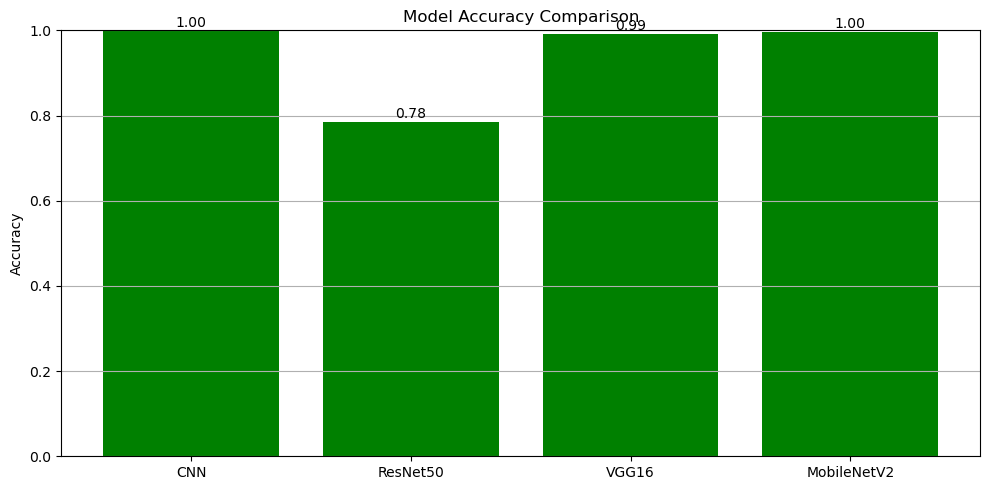

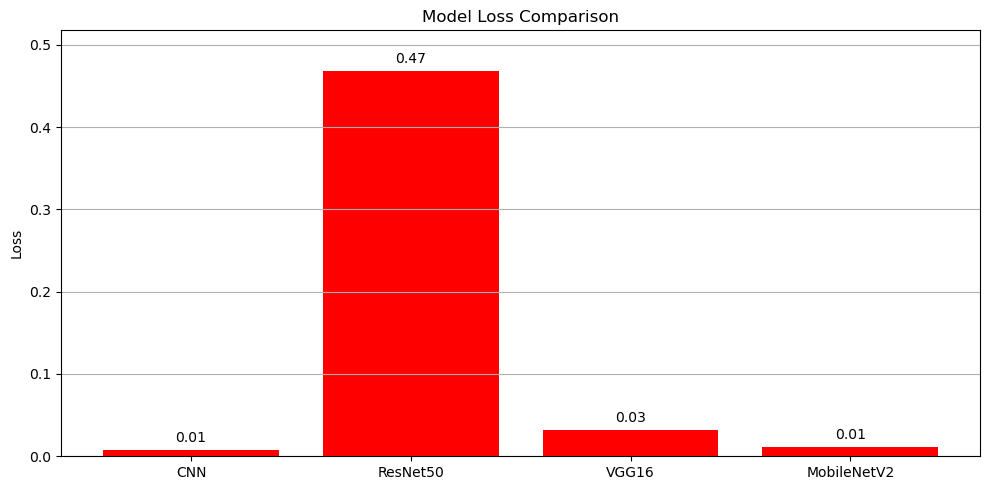

In [22]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

# Load all saved models
cnn_model = load_model("./models/cnn_model.h5")
resnet_model = load_model("./models/resnet50_model.h5")
vgg_model = load_model("./models/vgg16_model.h5")
mobilenet_model = load_model("./models/mobilenet_model.h5")

# Evaluate all models
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test, verbose=0)
resnet_loss, resnet_accuracy = resnet_model.evaluate(X_test, y_test, verbose=0)
vgg_loss, vgg_accuracy = vgg_model.evaluate(X_test, y_test, verbose=0)
mobilenet_loss, mobilenet_accuracy = mobilenet_model.evaluate(X_test, y_test, verbose=0)

# Names and metrics
model_names = ['CNN', 'ResNet50', 'VGG16', 'MobileNetV2']
accuracies = [cnn_accuracy, resnet_accuracy, vgg_accuracy, mobilenet_accuracy]
losses = [cnn_loss, resnet_loss, vgg_loss, mobilenet_loss]

# 📊 Accuracy Chart
plt.figure(figsize=(10, 5))
bars = plt.bar(model_names, accuracies, color='green')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 📉 Loss Chart
plt.figure(figsize=(10, 5))
bars = plt.bar(model_names, losses, color='red')
plt.title("Model Loss Comparison")
plt.ylabel("Loss")
plt.ylim(0, max(losses) + 0.05)
for i, loss in enumerate(losses):
    plt.text(i, loss + 0.01, f"{loss:.2f}", ha='center')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


These charts visually compare the accuracy and loss of CNN, ResNet50, VGG16, and MobileNetV2, clearly showing CNN and MobileNetV2 as the best-performing models with the highest accuracy (\~1.00) and lowest loss (\~0.01), while ResNet50 performs significantly worse.


# Conclusion:

#### Now, the model detects brain Cancer with:<br>

Accuracy: **99.84%** <br>

F1 Score: **0.99%** <br>
These results are excellent considering that the dataset is balanced.

**Performance Table:**

| Validation set  | Test set |
| --------- | -------- |
| Accuracy  | 99.84%%  |
| F1 score  | 0.99%    |